# Plot estimate from the algorithm $\hat{\theta}$ vs true $\theta^*$

In [1]:
import matplotlib.pyplot as plt
import math, time
import sys
import random
import numpy as np
sys.path.append('gridworld-gym-master/')

import gym
import gym_partially_observable_grid
from functions_es_gridworld import *

In [2]:
seed_val=2
np.random.seed(seed_val)
random.seed(seed_val)

In [3]:
T = 200000
alpha = 1
beta = 0.9 #beta must be less than alpha

eps = 3
A=0.1
B=1
tau=50
gamma=0.1
world_to_mimic='world2'
new_world_name='world2_new'

In [4]:
num_true_vals = 10
num_init_vals = 10
start_loc = 0 #first half
end_loc = 5 #end where the next one begins
# theta_init_all = np.linspace(1e-3, 1-1e-3, num=num_init_vals)
theta_init_all = np.random.rand(num_init_vals)
results_all = [[None]*num_init_vals for _ in range(num_true_vals)]
theta_hat_t_all = np.zeros((T, num_init_vals, num_true_vals))
theta_hat_mean_all = np.zeros((num_true_vals,))
theta_star_all = np.linspace(1e-3, 1-1e-3, num=num_true_vals) #analyse the last five values
# theta_star_all = [0.6]
avg_over = 4000 #one period at T

run 1 for theta_star=0.5554444444444444 done
run 2 for theta_star=0.5554444444444444 done
run 3 for theta_star=0.5554444444444444 done
run 4 for theta_star=0.5554444444444444 done
run 5 for theta_star=0.5554444444444444 done
run 6 for theta_star=0.5554444444444444 done
run 7 for theta_star=0.5554444444444444 done
run 8 for theta_star=0.5554444444444444 done
run 9 for theta_star=0.5554444444444444 done
run 10 for theta_star=0.5554444444444444 done
theta_star=0.5554444444444444 done
run 1 for theta_star=0.6663333333333333 done
run 2 for theta_star=0.6663333333333333 done
run 3 for theta_star=0.6663333333333333 done
run 4 for theta_star=0.6663333333333333 done
run 5 for theta_star=0.6663333333333333 done
run 6 for theta_star=0.6663333333333333 done
run 7 for theta_star=0.6663333333333333 done
run 8 for theta_star=0.6663333333333333 done
run 9 for theta_star=0.6663333333333333 done
run 10 for theta_star=0.6663333333333333 done
theta_star=0.6663333333333333 done
run 1 for theta_star=0.77722

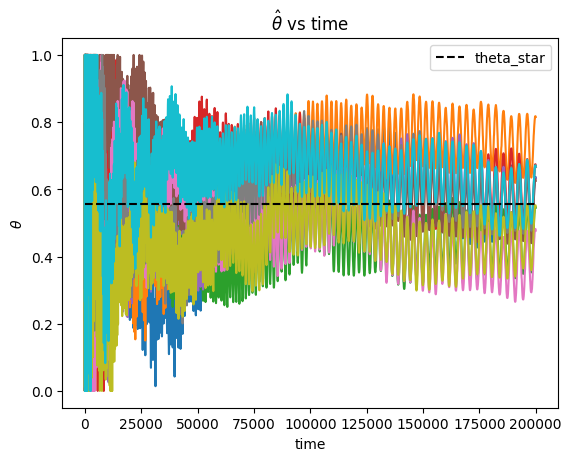

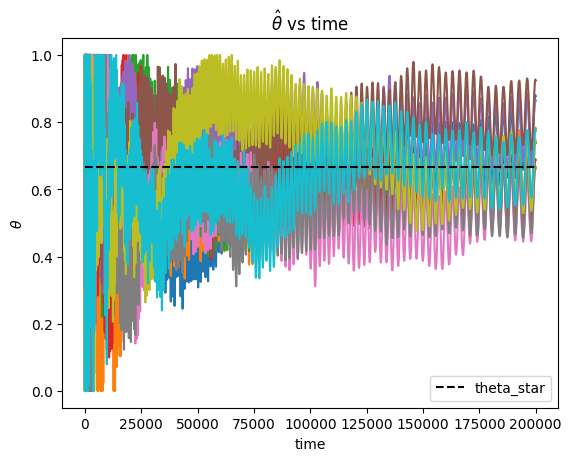

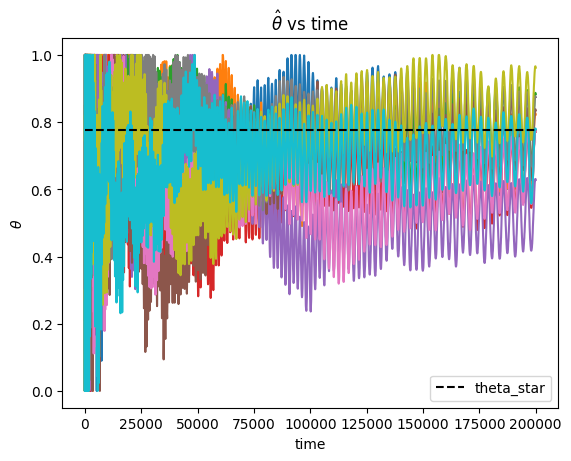

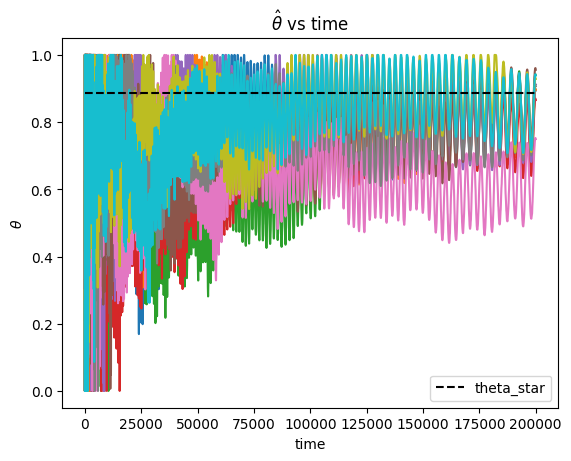

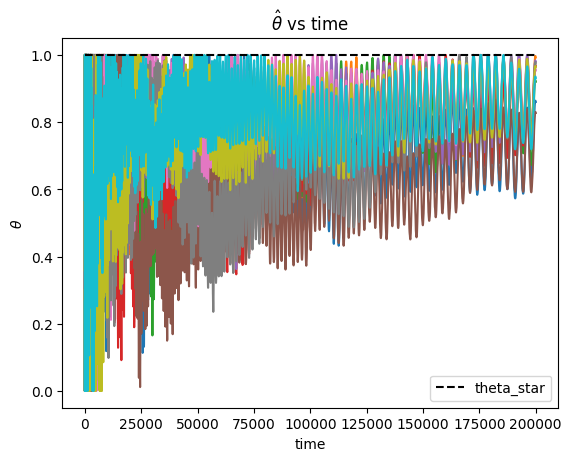

In [5]:
np.random.seed(0)
random.seed(0)

ticx = time.perf_counter()
for j in range(start_loc,end_loc):
    theta_star_j = theta_star_all[j]
    for i in range(num_init_vals):
        results_all[j][i] = estimate_theta_es_gridworld(theta_init_all[i], theta_star_j, T=T, alpha = alpha, beta = beta, eps = eps, \
                                A=A, B=B, tau=tau, gamma=gamma,\
                                world_to_mimic=world_to_mimic, new_world_name=new_world_name,\
                                rule_id_new='1', action_attempt_new=[0, 1, 2, 3],\
                                act_prob_pairs_new=[[(k,theta_star_j), (-1,1-theta_star_j)] for k in range(4)])
        theta_hat_t_all[:,i,j] = results_all[j][i]['theta_hat_t']
        print(f"run {i+1} for theta_star={theta_star_j} done")
        
        with open('status3.txt', 'w+') as f:
            f.write(f"theta_star={round(theta_star_j, 3)}, run {i+1} done \nRuntime:{time.perf_counter()-ticx}s")
    
    #save after all runs of a particular theta_star are complete
    np.savez('./results/algoperf3-'+str(j)+'.npz', T=T, A=A, B=B, tau=tau,\
     world_to_mimic=world_to_mimic,new_world_name=new_world_name, \
    eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
    num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
    results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
    theta_star_all=theta_star_all)
    
    #plot all runs of particular theta_star
    fig, ax = plt.subplots()
    for ix in range(num_init_vals):
        ax.plot(theta_hat_t_all[:,ix,j])
    ax.hlines(theta_star_j, 0, T, linestyles='dashed', colors='k', label='theta_star')
    ax.set_xlabel('time')
    ax.legend()
    ax.set_ylabel(r'$\theta$')
    ax.set_title(r"$\hat{\theta}$ vs time")
    plt.savefig('./figures_temporary/runs_theta_star'+str(round(theta_star_j, 3))+'.png')
    
    print(f"theta_star={theta_star_j} done")
    theta_hat_mean_all[j] = np.mean(np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0)) #average over the last 200 steps
tocx = time.perf_counter()
print(f"time={tocx-ticx}s")

In [6]:
theta_hat_t_pravg = np.zeros(theta_hat_t_all.shape)
for j in range(num_true_vals):
    for i in range(num_init_vals):
        for t in range(T):
            # theta_hat_t_pravg[t, i,j] = np.mean(theta_hat_t_all[int(2*t/3):t+1, i, j])
            if t>0:
                theta_hat_t_pravg[t, i,j] = theta_hat_t_pravg[t-1, i,j] + (1/t)*(theta_hat_t_all[t, i,j]-theta_hat_t_pravg[t-1, i,j])

In [7]:
theta_hat_mean_pravg = np.mean(np.mean(theta_hat_t_pravg[-avg_over:,:,:], axis=0), axis=0)

In [ ]:
# np.savez('./results/algoperf3-last5.npz', T=T, A=A, B=B, tau=tau,\
#          world_to_mimic=world_to_mimic,new_world_name=new_world_name, \
#         eps=eps, gamma=gamma, alpha=alpha, beta=beta, avg_over=avg_over,\
#         num_init_vals= num_init_vals, num_true_vals=num_true_vals, theta_init_all=theta_init_all, \
#         results_all=results_all, theta_hat_t_all=theta_hat_t_all, theta_hat_mean_all=theta_hat_mean_all,\
#         theta_star_all=theta_star_all, theta_hat_t_pravg=theta_hat_t_pravg, theta_hat_mean_pravg=theta_hat_mean_pravg)

In [ ]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j]]*num_init_vals, np.mean(theta_hat_t_all[-avg_over:,:,j], axis=0))
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_all, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Gridworld")
plt.legend()

In [ ]:
plt.plot(theta_star_all, theta_hat_mean_all, '*', label=r"$\hat{\theta}$")
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='k')
plt.xlabel(r"$\theta^*$")
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title("Results-Gridworld")
plt.legend()

In [ ]:
for p in range(5):
    plt.plot(theta_hat_t_all[:,p,4])
plt.hlines(theta_star_all[4], 0, T, linestyles='dashed', colors='k')
# plt.ylim(0,0.01)

In [ ]:
for p in range(10):
    plt.plot([np.mean(theta_hat_t_all[:i+1,p,5]) for i in range(T)])
plt.hlines(theta_star_all[5], 0, T, linestyles='dashed', colors='k')
# plt.ylim(0,0.01)

In [ ]:
fig, ax = plt.subplots(5, 2, squeeze=True, sharex=True, sharey=True, figsize=(12, 14))

for k in range(num_true_vals):
    for i in range(num_init_vals):
        ax[k//2, k%2].plot(theta_hat_t_all[:,i,k])
    ax[k//2, k%2].hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')
    ax[k//2, k%2].set_title(f"theta_star={round(theta_star_all[k],3)}")
plt.tight_layout()
fig.suptitle(r"$\hat{\theta}$ (Gridworld)",y=1.01)

In [ ]:
theta_hat_t_all.shape

In [ ]:
for j in range(num_true_vals):
    plt.scatter([theta_star_all[j]]*num_init_vals, np.mean(theta_hat_t_pravg[-avg_over:,:,j], axis=0))
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
plt.plot(theta_star_all, theta_hat_mean_pravg, 'k*', label=r"$\hat{\theta}$")
plt.xlabel(r"$\theta^*$")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='gray')
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title(r"$\hat{\theta}$ vs $\theta^*$: Gridworld (PR averaging)")
plt.legend()

In [ ]:
plt.plot(theta_star_all, theta_hat_mean_pravg, '*', label=r"$\hat{\theta}$")
plt.plot(theta_star_all, theta_star_all, '--', label="y=x")
# plt.vlines(dep_rate, 0, 1, linestyles='dashed', label="dep_rate", colors='k')
plt.xlabel(r"$\theta^*$")
plt.ylabel(r"parameter estimate $\hat{\theta}$")
plt.title("Results- Gridworld with PR averaging")
plt.legend()

In [ ]:
fig, ax = plt.subplots(5, 2, squeeze=True, figsize=(12,14), sharex=True, sharey=True)

for k in range(num_true_vals):
    for i in range(num_init_vals):
        ax[k//2, k%2].plot(theta_hat_t_pravg[:,i,k])
    ax[k//2, k%2].hlines(theta_star_all[k], 0, T, linestyles='dashed', colors='k')
    ax[k//2, k%2].set_title(f"theta_star={round(theta_star_all[k], 3)}")
plt.tight_layout()
fig.suptitle("PR Averaging", y=1.01)

In [ ]:
# import dill
# dill.dump_session('./saved_sessions/algo_performance_gridworld3.db')